In [1]:
from myutils.plotters import StandardPlotter
from construct_variables import (extract_values,
                                 extract_atoms,
                                 uppercase_letters)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


experiments = [2.00324, 2.00263, 2.00218]

In [171]:
vals_all = extract_values('../', exclude=['../9_0-Rhop_FarRad1',
                                          '../3_1-Rhop-LeftPhenyl',
                                          '../3_2-Rhop-RightPhenyl',
                                          '../4_0-inchain',
                                          '../4_1-inchainLarger',
                                          '../7_0-triple_broken',
                                          '../8_0-Hshift_FarRad1',
                                          '../8_1-Hshift_FarRad2',
                                          '../9_1-Rhop_FarRad2'])

0 ../1_0-AlkylShift
1 ../2_0-Hshift
2 ../3_0-Rhop
3 ../5_0-primary_in_ring
4 ../6_0-primary_in_triple


In [3]:
# Selected for the paper
vals= vals_all[[4, # Primary_in_triple
                3, # primary_in_ring
                2, # rhop
                0, # alkylshift
                1]] #H-shift

In [54]:
sp.spaces[0]

In [156]:
sp.ax[0].get_xlim()

(0.8, 5.2)

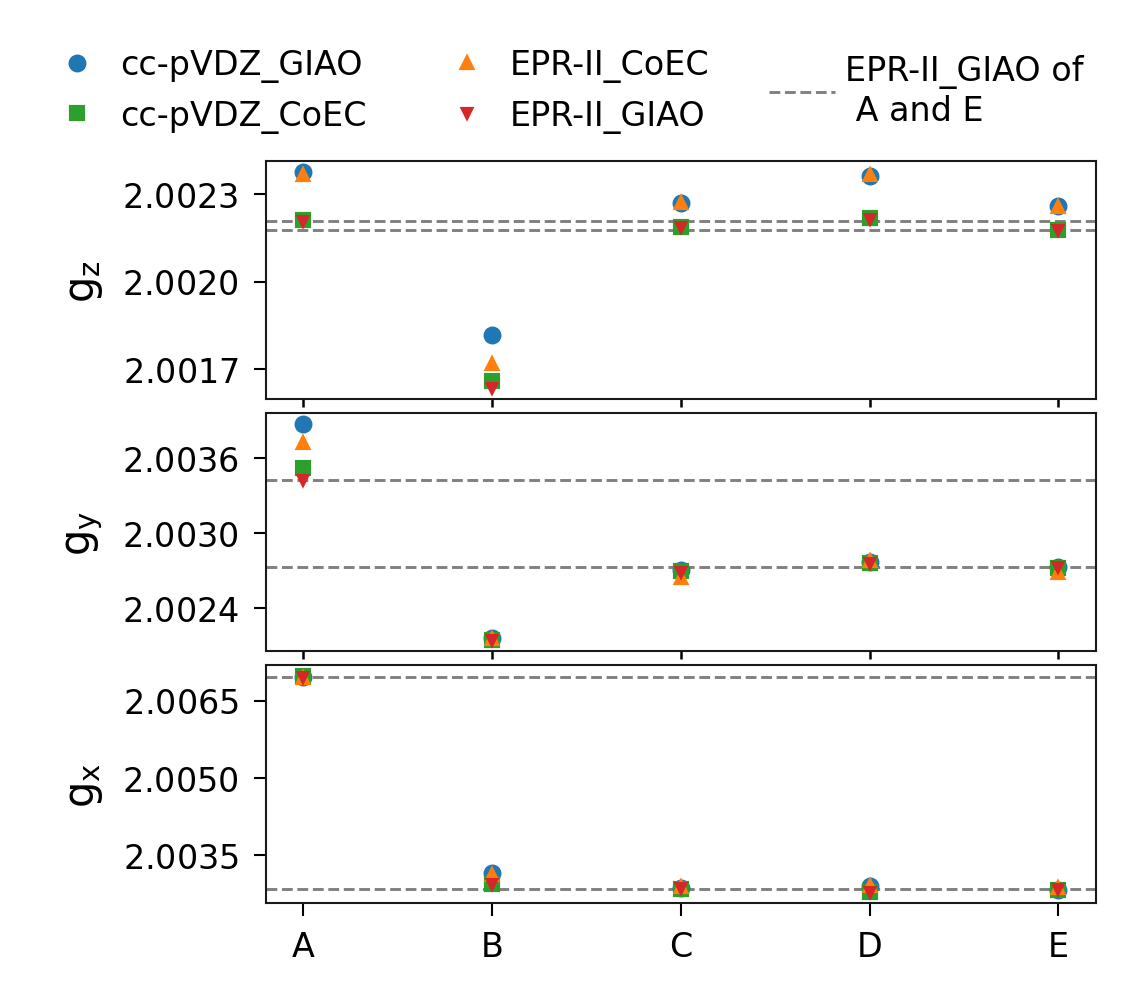

In [172]:
fig, ax = plt.subplots(3,1)
xlim = (0.8, 5.2)
sp = StandardPlotter(fig=fig, ax=ax, ax_pref={'sci_not':True, 'xlim': xlim})

new_order = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
sp.change_general_pars({'axes.prop_cycle': mpl.cycler(color=new_order)})
yticks = [[2.0017, 2.0020, 2.0023],
          [2.0024, 2.0030, 2.0036],
          [2.0035, 2.0050, 2.0065]]

xyz_lab = ['x', 'y', 'z']

for i in [0, 1, 2]: #x, y, z
    # Add used values
    sp.plot_data(xlims,
                 [vals[:, :, 2 - i].T[3][0]]*2,
                 ax=i,
                 pstyle='--',
                 color_plot='gray',
                 lw =0.7,
                 data_label='EPR-II_GIAO of\n A and E')
    sp.plot_data(xlims,
                 [vals[:, :, 2 - i].T[3][-1]]*2,
                 ax=i,
                 pstyle='--',
                 color_plot='gray',
                 lw =0.7)

    sp.plot_data(vals[:, :, 2 - i].T, ax=i,
                 pstyle=['o', 's', '^', 'v'],
                 data_label=['cc-pVDZ_GIAO',
                             'cc-pVDZ_CoEC',
                             'EPR-II_CoEC',
                             'EPR-II_GIAO'],
                 markersize=np.array([5.5, 4.5, 4, 3.5])*0.6)

    sp.axis_setter(ax=i,
                   ylabel=r'g$_{\rm{ ' + xyz_lab[2 - i] +'}}$',
                   xminor=[1,2,3, 4, 5],
                   xticks=[],
                   yticks=yticks[i])

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)+1),
                    uppercase_letters[:len(vals)])
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.2, 0.075], [0.99, 0.86]],
                      spaces=[0.015, 0.015])
handles, labels = sp.ax[0].get_legend_handles_labels()
line_hand, line_label = handles[0], labels[0]
handles = [handles[i +1 ] for i in range(len(handles) - 1)]
labels =  [labels[i +1 ] for i in range(len(labels) - 1)]
space = sp.add_space()
legend = sp.spaces[0].frame.legend(handles,
                        labels,
                        loc='center left',
                        bbox_to_anchor=(-0.04, 0.935),
                        ncols=2,
                        fontsize=8,
                        handletextpad=0.3)
legend2 = sp.spaces[1].frame.legend([line_hand],
                        [line_label],
                        loc='center left',
                        bbox_to_anchor=(0.65, 0.935),
                        ncols=3,
                        fontsize=8,
                        handletextpad=0.3)
legend.get_frame().set_alpha(0)
legend2.get_frame().set_alpha(0)
#sp.ax[0].xaxis.label.set_size(10)
#sp.spaces[0].show_frame(majordelta=0.1, minordelta=0.025)





In [166]:
sp.fig.savefig('g-values.eps', dpi=300)

In [24]:
sp.ax[0].get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7fc0989995b0>,
 ['cc-pVDZ', 'cc-pVDZ_i', 'EPR II', 'EPR II_i', 'Experiment'])

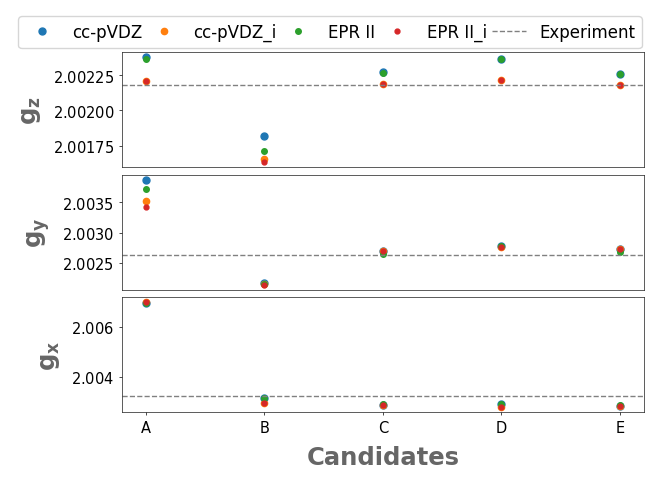

In [42]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax, ax_pref={'factor': 7, 'sci_not':True})


yticks = [[2.0017, 2.0020, 2.0023],
          [2.0024, 2.0030, 2.0036],
          [2.0035, 2.0148, 2.0270]]
xyz_lab = ['x', 'y', 'z']
for i in [0, 1, 2]:
    sp.plot_data(vals[:, :, 2 - i].T, ax=i,
                 pstyle='o',
                 data_label=['cc-pVDZ',
                             'cc-pVDZ_i',
                             'EPR II',
                             'EPR II_i'],
                 markersize=[5, 4.5, 4, 3.5])
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[]) # ,
                   #yticks=[min(vals[:, :, 2 - i].T.flatten()), max(vals[:, :, 2 - i].T.flatten())],
                   #yticks=yticks[i])
                   #ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i])

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)+1),
                    uppercase_letters[:len(vals)])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.175, 0.16], [0.99, 0.91]],
                      spaces=[0.015, 0.015])
handles, labels = sp.ax[0].get_legend_handles_labels()
sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
                mode="expand", ncols=5,
                fontsize=12,
                bbox_transform=sp.fig.transFigure)

#sp.spaces[0].show_frame(majordelta=0.1, minordelta=0.025)


In [41]:
sp.fig.savefig('g-values.png', dpi=300)

In [22]:
sp.fig.savefig('AllMethods-AllCandidates.png', dpi=300)

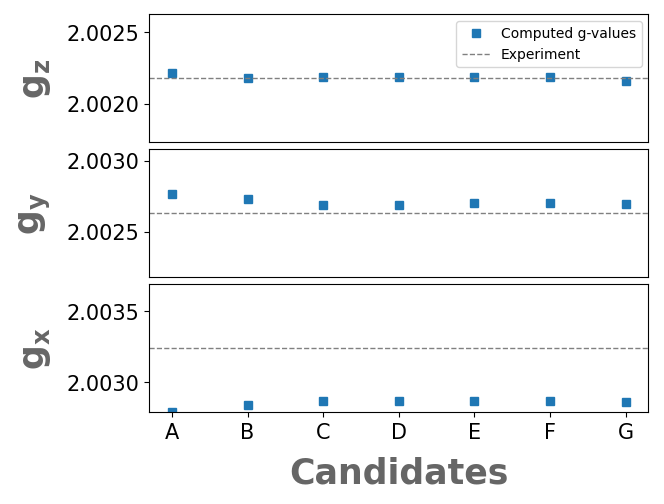

In [23]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax)

for i in [0, 1, 2]:
    sp.plot_data(vals[:-2, 3, 2 - i].T, ax=i,
                 pstyle='s',
                 data_label='Computed g-values')
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[],
                   ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i],
                   sci_not=False)

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)-1),
                    uppercase_letters[:len(vals) - 2])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.21, 0.16], [0.99, 0.99]],
                      spaces=[0.015, 0.015])
handles, labels = sp.ax[0].get_legend_handles_labels()
sp.ax[0].legend()

# sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
#                 mode="expand", ncols=5,
#                 bbox_transform=sp.fig.transFigure)


In [24]:
sp.fig.savefig('only_one_method.png', dpi=300)

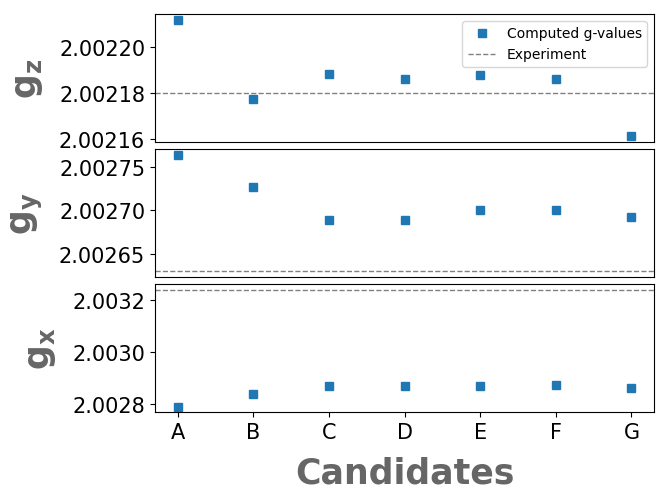

In [27]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax)


for i in [0, 1, 2]:
    sp.plot_data(vals[:-2, 3, 2 - i].T, ax=i,
                 pstyle='s',
                 data_label='Computed g-values')
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[],
                   #ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i],
                   sci_not=False)

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)-1),
                    uppercase_letters[:len(vals) - 2])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.21, 0.16], [0.99, 0.99]],
                      spaces=[0.015, 0.015])
sp.ax[0].legend()


# sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
#                 mode="expand", ncols=5,
#                 bbox_transform=sp.fig.transFigure)


In [28]:
sp.fig.savefig('only_one_method2.png', dpi=300)